# Project 2 - Problem 2: Creating Data Science Notebooks
## GIS5090 - Intro to Python Programming for GIS and Remote Sensing
### Carter Hanford
This is the Jupyter Notebook for problem 2 of project 2 in GIS5090. This problem entails creating data science notebooks exploring the **Missouri Demographic study**. The goal of this notebook/problem is to utilize ArcGIS Python API and web services, and answer a few questions regarding the study. 

* `1) - For the counties in Missouri only, what is the dominant Tapestry LifeMode Group Name.`
* `2) - Create a histrogram that shows the number of Missouri counties per Tapestry LifeMode Group Name.`
* `3) - Create a pie chart that shows the number of Missouri counties per Tapestry LifeMode Group Name.`
* `4) - For the counties in Missouri, what is the dominant Dominant Tapestry Segment Name.`
* `5) - Create a histogram that shows the number of Missouri counties per Tapestry Segment Name`
* `6) - Create a pie chart that shows the number of Missouri counties per Tapestry Segment Name.`
* `7) - Make sure the notebook is well-documented.`

Now that we've highlighted the questions and introductions, let's get started!

![](https://upload.wikimedia.org/wikipedia/en/thumb/4/4b/Saint_Louis_University_logo.svg/250px-Saint_Louis_University_logo.svg.png).

### Problem 1 
This question asks us to identify the dominant Tapestry LifeMode group name for Missouri only. Since we only want Missouri, we'll need to use a query to narrow down the data. 

Let's start with loading modules and calling the feature service data:

In [1]:
# load arcgis modules
from arcgis.gis import GIS
from arcgis.features.analysis import *
from arcgis.features import FeatureLayer

# load data viz modules
import pandas as pd
import matplotlib.pyplot as plt

# connect to ArcGIS online
gis = GIS("http://slustl.maps.arcgis.com/home", "carter.hanford_SLUSTL")

Enter password: ········


Now that we've imported the modules we need and connected to ArcGIS online, let's access the Missouri Demographic data. To do this we'll need to connect to the feature service which is available online, then use our ArcGIS online connection to load it as an object in our notebook.

In [2]:
# load feature layer data
fl = FeatureLayer(
    url='https://services.arcgis.com/P3ePLMYs2RVChkJx/ArcGIS/rest/services/Tapestry_Households/FeatureServer/1', 
    gis=gis
)

Next, the question asks us to look at only Missouri, so we'll use a search query to only include results from the state of Missouri. Then we'll write that to an spatial data frame object and take a look at the table to see what we can do with it.

In [3]:
# create data object from search query
mo_demo = fl.query(where = "STATE_NAME = 'Missouri'").sdf
mo_demo

,OBJECTID,ID,NAME,STATE_NAME,ST_ABBREV,County_AREA,TSEGNUM,TSEGCODE,TSEGNAME,THHBASE,...,THHGRPL6,THHGRPL7,THHGRPL8,THHGRPL9,THHGRPL10,THHGRPL11,THHGRPL12,THHGRPL13,THHGRPL14,SHAPE
0,1484,29001,Adair County,Missouri,MO,569.508658,38,8F,Old and Newcomers,9939,...,2312,0,2178,0,718,414,552,0,2216,"{'rings': [[[-10280362.7670118, 4916410.069564..."
1,1485,29003,Andrew County,Missouri,MO,436.317612,26,6F,Heartland Communities,6896,...,4824,0,0,0,456,0,0,0,0,"{'rings': [[[-10531483.9534014, 4884315.773069..."
2,1486,29005,Atchison County,Missouri,MO,556.848560,24,6D,Prairie Living,2480,...,1718,0,0,0,0,0,324,0,0,"{'rings': [[[-10616987.3411962, 4950653.710427..."
3,1487,29007,Audrain County,Missouri,MO,696.737302,58,12C,Small Town Simplicity,9575,...,4784,0,537,0,0,0,2879,0,0,"{'rings': [[[-10209994.3775193, 4770334.446140..."
4,1488,29009,Barry County,Missouri,MO,790.957836,46,10A,Southern Satellites,14390,...,5737,272,0,688,5942,238,382,0,0,"{'rings': [[[-10420742.210988, 4428344.5967196..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,1594,29223,Wayne County,Missouri,MO,774.074683,47,10B,Rooted Rural,5526,...,844,0,0,1187,2720,0,775,0,0,"{'rings': [[[-10042980.631842, 4483088.3538738..."
111,1595,29225,Webster County,Missouri,MO,593.759317,46,10A,Southern Satellites,13299,...,3650,0,579,0,5698,0,1535,0,0,"{'rings': [[[-10336402.1117608, 4506783.785767..."
112,1596,29227,Worth County,Missouri,MO,266.848030,24,6D,Prairie Living,944,...,944,0,0,0,0,0,0,0,0,"{'rings': [[[-10487882.3352475, 4921935.643943..."
113,1597,29229,Wright County,Missouri,MO,683.011720,47,10B,Rooted Rural,7625,...,890,0,0,0,4607,0,2128,0,0,"{'rings': [[[-10269474.7189368, 4505235.714080..."


This particular question asks us to look at the dominant Tapestry LifeMode Group Name which is characterized by the variable `TLIFENAME` in this data frame. In order to find the most dominant, we can simply write the variable to an object and use the `max` function to find the largest value.

In [4]:
# set object to TLIFENAME variable 
tlife = mo_demo['TLIFENAME']
print(min(tlife))

Cozy Country Living


In Missouri, the dominant Tapestry LifeMode Group Name is 'Cozy Country Living.' 

Just for fun, I want to see what the least dominant group name is:

In [5]:
print(max(tlife))

Senior Styles


I know it may seem counter-intuitive to use `min` to locate the dominant group and `max` to locate the least dominant group, but let's take a look at a list of the data just to verify that these function calls are actually doing their job:

In [6]:
list(tlife)

['Middle Ground',
 'Cozy Country Living',
 'Cozy Country Living',
 'Hometown',
 'Rustic Outposts',
 'Cozy Country Living',
 'Cozy Country Living',
 'Cozy Country Living',
 'Rustic Outposts',
 'Middle Ground',
 'Hometown',
 'Hometown',
 'Cozy Country Living',
 'Family Landscapes',
 'Cozy Country Living',
 'Cozy Country Living',
 'Cozy Country Living',
 'Rustic Outposts',
 'Cozy Country Living',
 'Rustic Outposts',
 'Cozy Country Living',
 'Family Landscapes',
 'Rustic Outposts',
 'GenXurban',
 'Cozy Country Living',
 'Family Landscapes',
 'Cozy Country Living',
 'Rustic Outposts',
 'Rustic Outposts',
 'Rustic Outposts',
 'Cozy Country Living',
 'Cozy Country Living',
 'Rustic Outposts',
 'Rustic Outposts',
 'Rustic Outposts',
 'Cozy Country Living',
 'Rustic Outposts',
 'Cozy Country Living',
 'Family Landscapes',
 'Cozy Country Living',
 'Cozy Country Living',
 'Cozy Country Living',
 'Senior Styles',
 'Cozy Country Living',
 'Cozy Country Living',
 'Rustic Outposts',
 'Rustic Outposts

As you can see here, 'Cozy Country living' is certainly the most dominant life group listed here for Missouri.

### Problem 2
Problem 2 asks us to create a histrogram that shows the number of Missouri counties per Tapestry LifeMode Group Name.

In [ ]:
hist = plt.hist(mo_demo['TLIFENAME'], bins = 10, alpha = 0.5)

In this histogram case, the count represents the number of Missouri counties per tapestry life group. As the previous question confirmed, "Cozy Country Living" is the dominant lifegroup name, with almost 50 counties in Missouri belonging to this group.

### Problem 3
Problem 3 asks us to create a pie chart that shows the number of Missouri counties per Tapestry LifeMode Group Name. This will be very similar to the previous two problems in terms of outcomes.

In [ ]:
tlife = mo_demo["TLIFENAME"]

In [31]:
# use this to find count of life category
#list(tlife).count('name goes here')

([<matplotlib.patches.Wedge at 0x1caa5790080>,
 [Text(0.2761482812213907, 1.1677937004361993, 'Cozy Country Living'),
  Text(-1.0313589259228029, 0.3824902167629424, 'Middle Ground'),
  Text(-1.0999999999999999, -2.5747358288378247e-08, 'Hometown'),
  Text(-0.33991864973549474, -1.0461621822461364, 'Rustic Outposts'),
  Text(0.8899187331606258, -0.6465637233635886, 'Family Landscapes'),
  Text(1.0592090319388425, -0.2967763916809762, 'GenXurban'),
  Text(1.0897545477089876, -0.14978326257489566, 'Senior Styles'),
  Text(1.0983585864414593, -0.06007008898211837, 'Scholars and Patriots')],
 [Text(0.16108649737914457, 0.6812129919211163, '42.6%'),
  Text(-0.5625594141397106, 0.2086310273252413, '3.5%'),
  Text(-0.5999999999999999, -1.4044013611842678e-08, '7.8%'),
  Text(-0.1854101725829971, -0.5706339175888016, '32.2%'),
  Text(0.485410218087614, -0.3526711218346847, '7.8%'),
  Text(0.5777503810575504, -0.16187803182598698, '3.5%'),
  Text(0.5944115714776295, -0.08169996140448854, '0.9%'

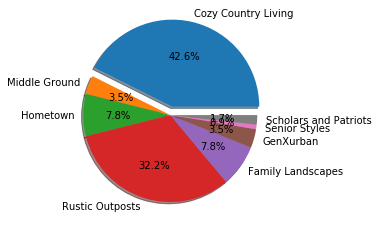

In [30]:
# create labels
labels = ('Cozy Country Living', 'Middle Ground', 'Hometown', 'Rustic Outposts', 'Family Landscapes', 'GenXurban', 
'Senior Styles', 'Scholars and Patriots')

# add sizes
sizes = [49, 4, 9, 37, 9, 4, 1, 2]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0)

# create pie chart
plt.pie(sizes, labels = labels, explode = explode, autopct='%1.1f%%',
        shadow=True)

Again, nothing new here in terms of top tapestry names. Just some cool new data visualizations!

### Problem 4
Problem 4 asks us to find the dominant Dominant Tapestry Segment Name for all counties in Missouri. For this problem and the next two, we'll be doing the same analysis in terms of code. We're just looking at a new variable!

In [44]:
# set object to TSEGNAME variable 
tseg = mo_demo['TSEGNAME']

Let's start by taking a look at all of the `'TSEGNAME'` listings in the state of Missouri:

In [48]:
list(tseg)

['Old and Newcomers',
 'Heartland Communities',
 'Prairie Living',
 'Small Town Simplicity',
 'Southern Satellites',
 'Heartland Communities',
 'Prairie Living',
 'Rural Resort Dwellers',
 'Rooted Rural',
 'Bright Young Professionals',
 'Traditional Living',
 'Small Town Simplicity',
 'Salt of the Earth',
 'Middleburg',
 'Rural Resort Dwellers',
 'Green Acres',
 'Prairie Living',
 'Rural Bypasses',
 'Green Acres',
 'Rooted Rural',
 'Prairie Living',
 'Middleburg',
 'Rooted Rural',
 'Rustbelt Traditions',
 'Salt of the Earth',
 'Middleburg',
 'Prairie Living',
 'Rooted Rural',
 'Rooted Rural',
 'Rooted Rural',
 'Prairie Living',
 'Prairie Living',
 'Rooted Rural',
 'Rooted Rural',
 'Rural Bypasses',
 'Salt of the Earth',
 'Rooted Rural',
 'Heartland Communities',
 'Middleburg',
 'Prairie Living',
 'Prairie Living',
 'Heartland Communities',
 'Senior Escapes',
 'Heartland Communities',
 'Heartland Communities',
 'Rooted Rural',
 'Rooted Rural',
 'Rustbelt Traditions',
 'Traditional Livin

Just from simply looking at the list, it looks like 'Rooted Rural' appears quite a bit more often than any other segment name.

Let's count those:

In [ ]:
# count rooted rural in list
list(tseg).count('Rooted Rural')

There are 27 instances of 'Rooted Rural' segment names of the counties in Missouri. 

Here's what is interesting though, in the previous code above I was able to use the `max` function to find the maximum value that appears in a list. When using it here, however, it gives me 'Traditional Living' which only appears twice in all the counties. 

In [45]:
max(list(tseg))

'Traditional Living'

In [51]:
# count 
list(tseg).count('Traditional Living')

2

Using the `min` call, however, does give us the minimum value in the list, or the least dominant.

In [50]:
min(list(tseg))

'Bright Young Professionals'

In [52]:
# count 
list(tseg).count('Bright Young Professionals')

1

### Problem 5
Problem 5 asks us to create a histogram that shows the number of Missouri counties per Tapestry Segment Name.

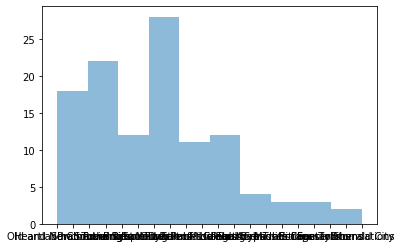

In [53]:
hist = plt.hist(mo_demo['TSEGNAME'], bins = 10, alpha = 0.5)

Similar to the previous problem, we can confirm that 'Rooted Rural' does in fact have the highest instances in Missouri counties with a count of 27.

### Problem 6
Problem 6 asks us to create a pie chart that shows the number of Missouri counties per Tapestry Segment Name.

Again, we'll use the same workflow as before.

In [54]:
tseg = mo_demo['TSEGNAME']
list(tseg)

['Old and Newcomers',
 'Heartland Communities',
 'Prairie Living',
 'Small Town Simplicity',
 'Southern Satellites',
 'Heartland Communities',
 'Prairie Living',
 'Rural Resort Dwellers',
 'Rooted Rural',
 'Bright Young Professionals',
 'Traditional Living',
 'Small Town Simplicity',
 'Salt of the Earth',
 'Middleburg',
 'Rural Resort Dwellers',
 'Green Acres',
 'Prairie Living',
 'Rural Bypasses',
 'Green Acres',
 'Rooted Rural',
 'Prairie Living',
 'Middleburg',
 'Rooted Rural',
 'Rustbelt Traditions',
 'Salt of the Earth',
 'Middleburg',
 'Prairie Living',
 'Rooted Rural',
 'Rooted Rural',
 'Rooted Rural',
 'Prairie Living',
 'Prairie Living',
 'Rooted Rural',
 'Rooted Rural',
 'Rural Bypasses',
 'Salt of the Earth',
 'Rooted Rural',
 'Heartland Communities',
 'Middleburg',
 'Prairie Living',
 'Prairie Living',
 'Heartland Communities',
 'Senior Escapes',
 'Heartland Communities',
 'Heartland Communities',
 'Rooted Rural',
 'Rooted Rural',
 'Rustbelt Traditions',
 'Traditional Livin

In [77]:
# use this to find count of life segment category
#list(tseg).count('Segment name goes here')

([<matplotlib.patches.Wedge at 0x1caa5a7e668>,
 [Text(0.8719923754143248, 0.824396322904999, 'Rooted Rural'),
  Text(-3.2184197595132574e-08, 1.0999999999999996, 'Old and Newcomers'),
  Text(-0.532090825714007, 0.9627457365218431, 'Heartland Communities'),
  Text(-1.0844581373133657, 0.1842567459140247, 'Prairie Living'),
  Text(-0.991065700431763, -0.47727222570321337, 'Small Town Simplicity'),
  Text(-0.7329811328990778, -0.8202064732821758, 'Southern Satellites'),
  Text(-0.4209516328768514, -1.0162675448809297, 'Rural Resort Dwellers'),
  Text(-0.27475396971838606, -1.0651339146435947, 'Bright Young Professionals'),
  Text(-0.18425668245508847, -1.0844581480954647, 'Traditional Living'),
  Text(0.15376953647205188, -1.0891992148607024, 'Salt of the Earth'),
  Text(0.6365385660380133, -0.8971168563494223, 'Middleburg'),
  Text(0.8971170649390199, -0.6365382720584823, 'Green Acres'),
  Text(0.9910658400737541, -0.477271935733607, 'Rural Bypasses'),
  Text(1.038271730154863, -0.363306

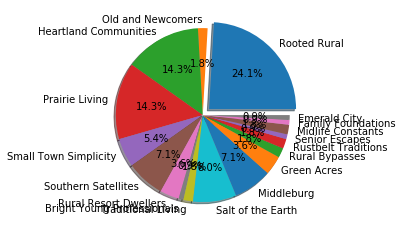

In [76]:
# create labels
labels = ('Rooted Rural', 'Old and Newcomers', 'Heartland Communities', 'Prairie Living', 'Small Town Simplicity', 
         'Southern Satellites', 'Rural Resort Dwellers', 'Bright Young Professionals', 'Traditional Living', 'Salt of the Earth',
         'Middleburg', 'Green Acres', 'Rural Bypasses', 'Rustbelt Traditions', 'Senior Escapes', 'Midlife Constants', 
         'Family Foundations', 'Emerald City')

# add sizes
sizes = [27, 2, 16, 16, 6, 8, 4, 1, 2, 9, 8, 4, 2, 2, 1, 2, 1, 1]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

# create pie chart
plt.pie(sizes, labels = labels, explode = explode, autopct='%1.1f%%',
        shadow=True)